## Load the Libraries and Inspect the dataset 

## Data Cleaning Steps (Data Preprocessing)

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,META,2/28/22,207.679993,213.149994,206.830002,211.029999,211.029999,34239800
1,META,3/1/22,209.869995,211.750000,202.220001,203.490005,203.490005,27094900
2,META,3/2/22,204.779999,209.149994,202.020004,208.110001,208.110001,29452100
3,META,3/3/22,209.020004,209.080002,201.419998,202.970001,202.970001,27263500
4,META,3/4/22,202.369995,205.889999,198.789993,200.059998,200.059998,32130900
...,...,...,...,...,...,...,...,...
995,TSLA,2/17/23,199.990005,199.990005,208.440002,197.500000,208.309998,213080200
996,TSLA,2/21/23,204.990005,204.990005,209.710007,197.220001,197.369995,180018600
997,TSLA,2/22/23,197.929993,197.929993,201.990005,191.779999,200.860001,191828500
998,TSLA,2/23/23,203.910004,203.910004,205.139999,196.330002,202.070007,146360000


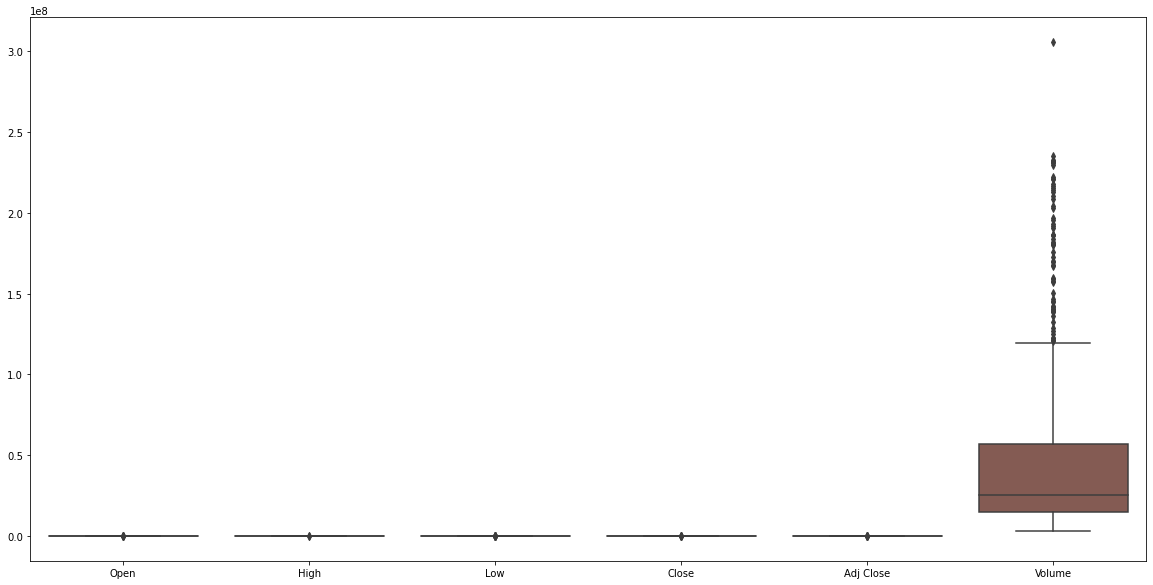

In [1]:
## Load the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt


#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('Stock Prices updated.csv')


df = df[['Symbol','Date','Open','High','Low','Close','Adj Close','Volume']]

## Data Cleaning steps(data Preprocessing)
df.isnull().sum()
df.isna().sum()

# Remove any duplicate rows (if any)
# df.drop_duplicates(inplace=True)

# Check for missing values and drop them if any
#df.dropna(inplace=True)

# check for any outliers in the data
sns.boxplot(data=df[['Open','High','Low','Close','Adj Close','Volume']])

## get summary statistics of the data
df.describe()
df


## As we can see here Volume has many outliers so we will be further using IQR(Inter Quartile Range) to remove the Outliers from the dataset

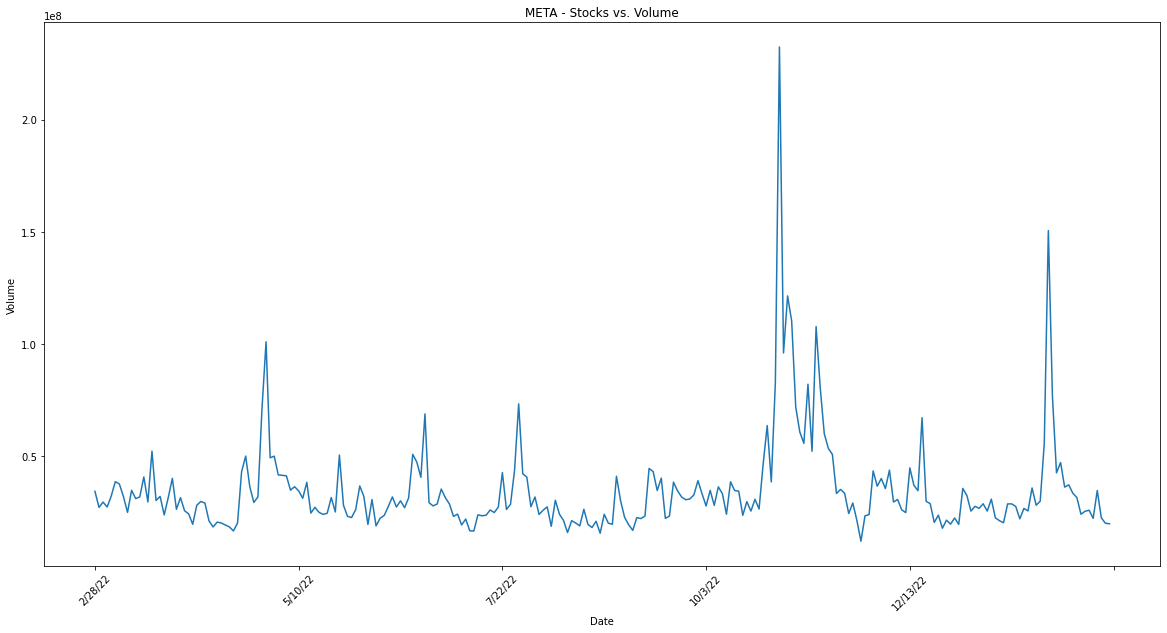

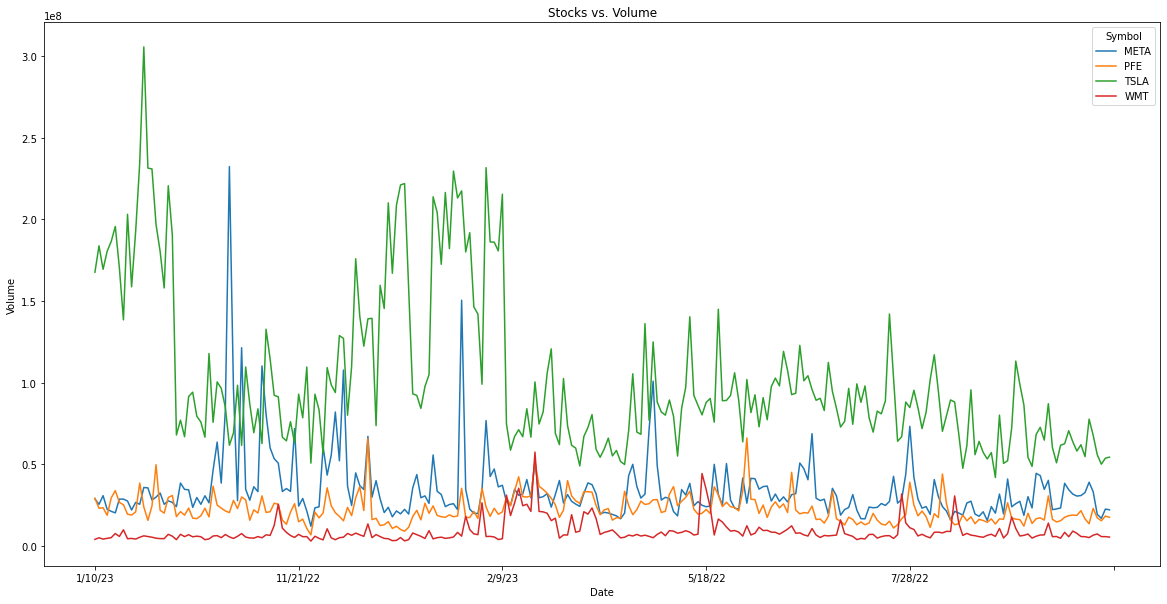

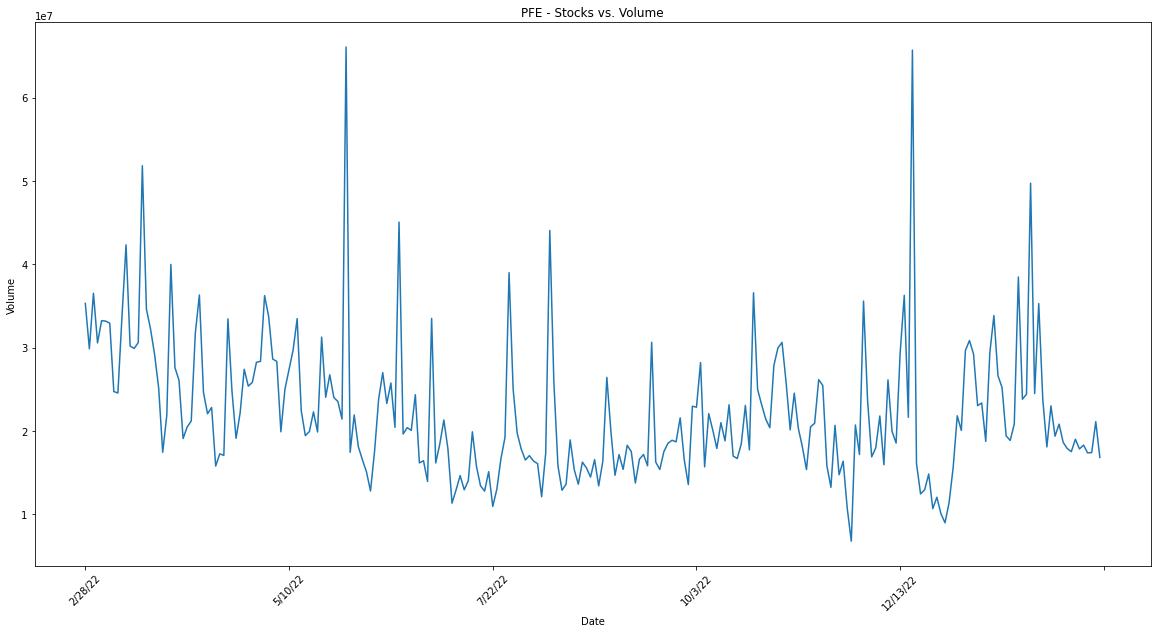

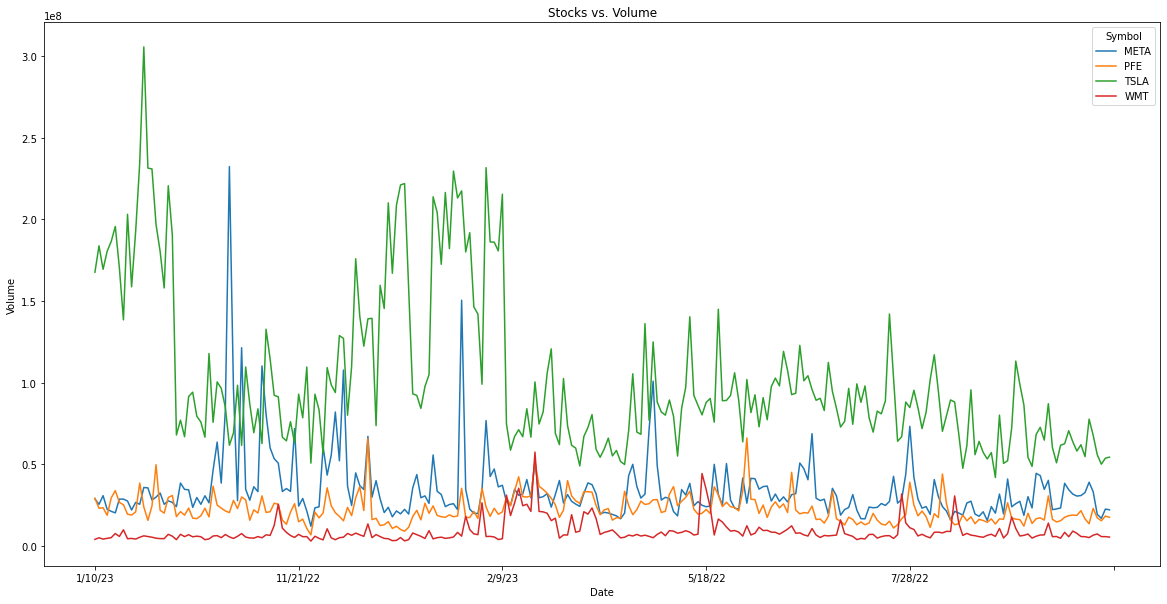

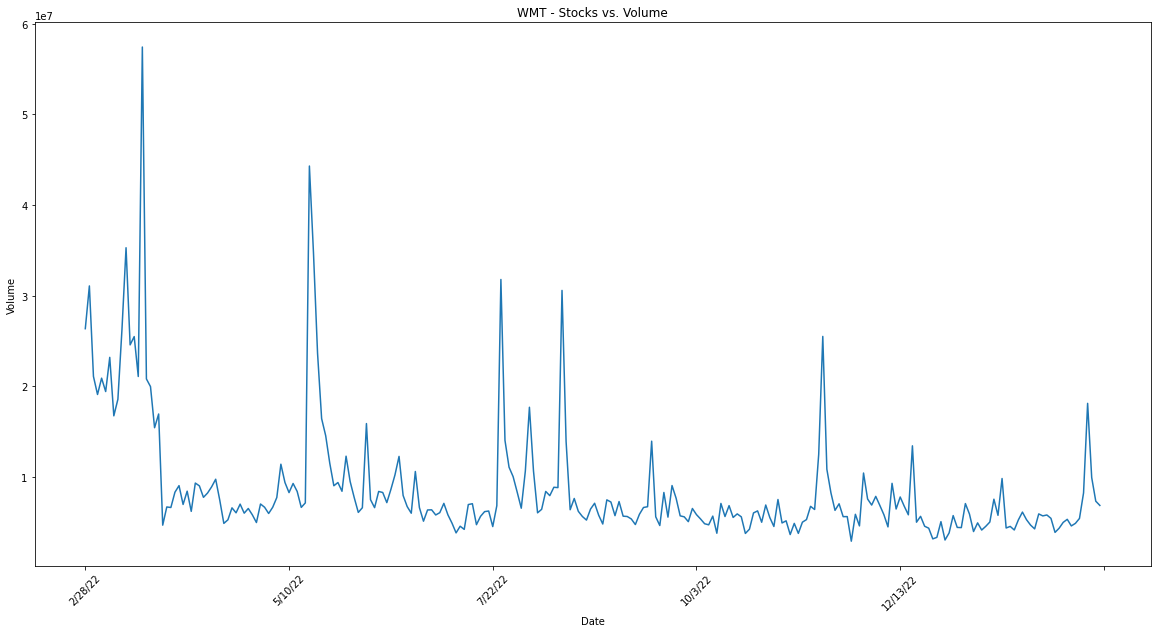

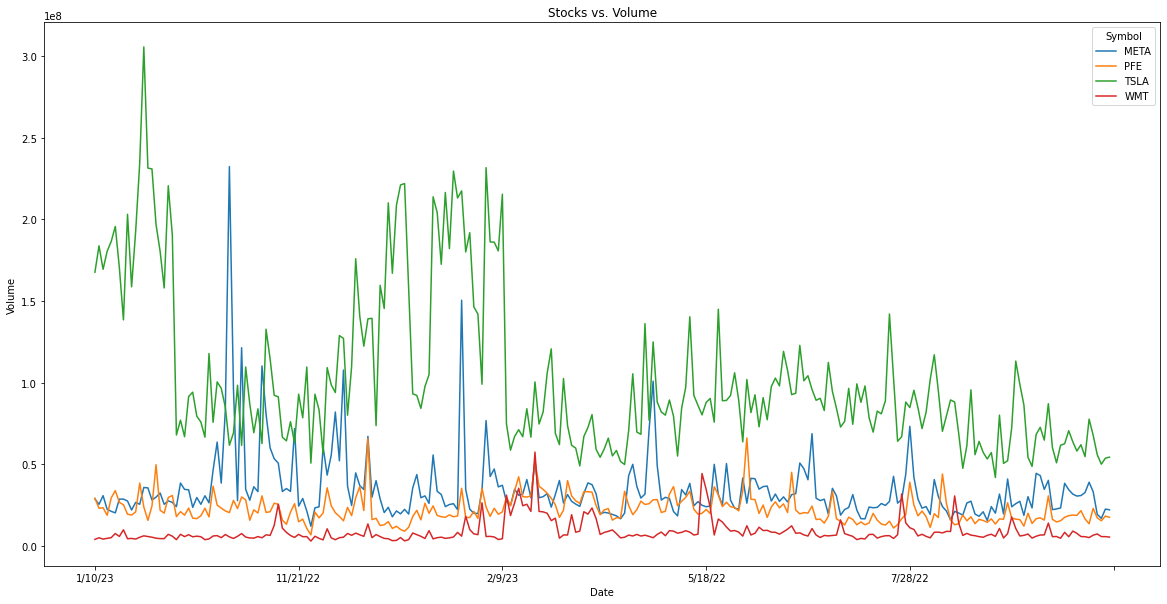

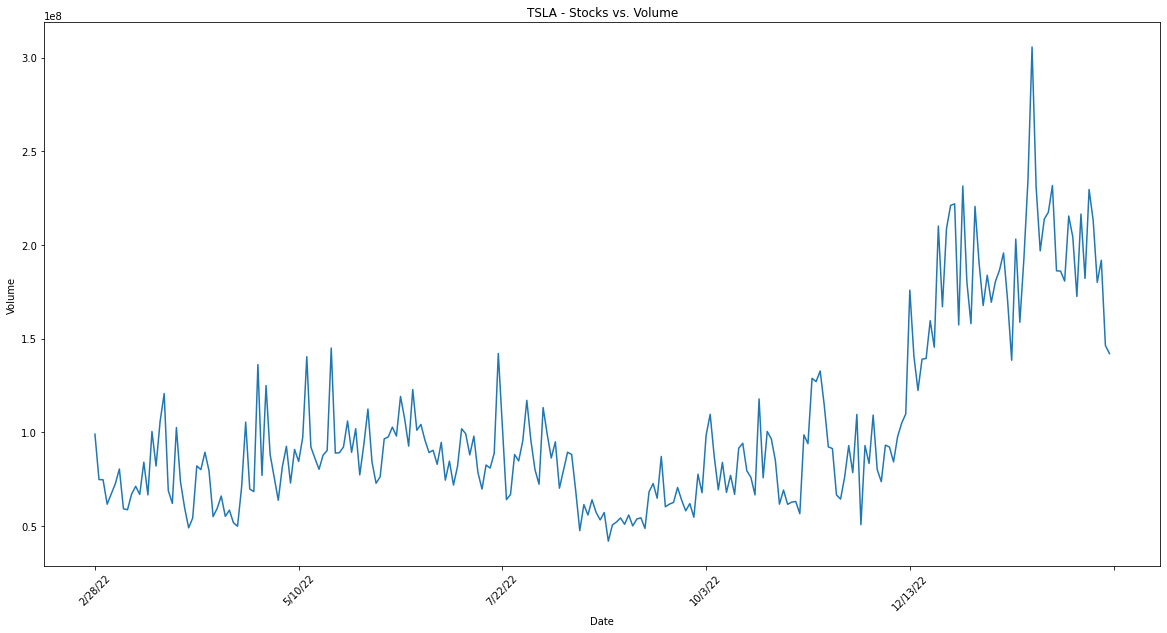

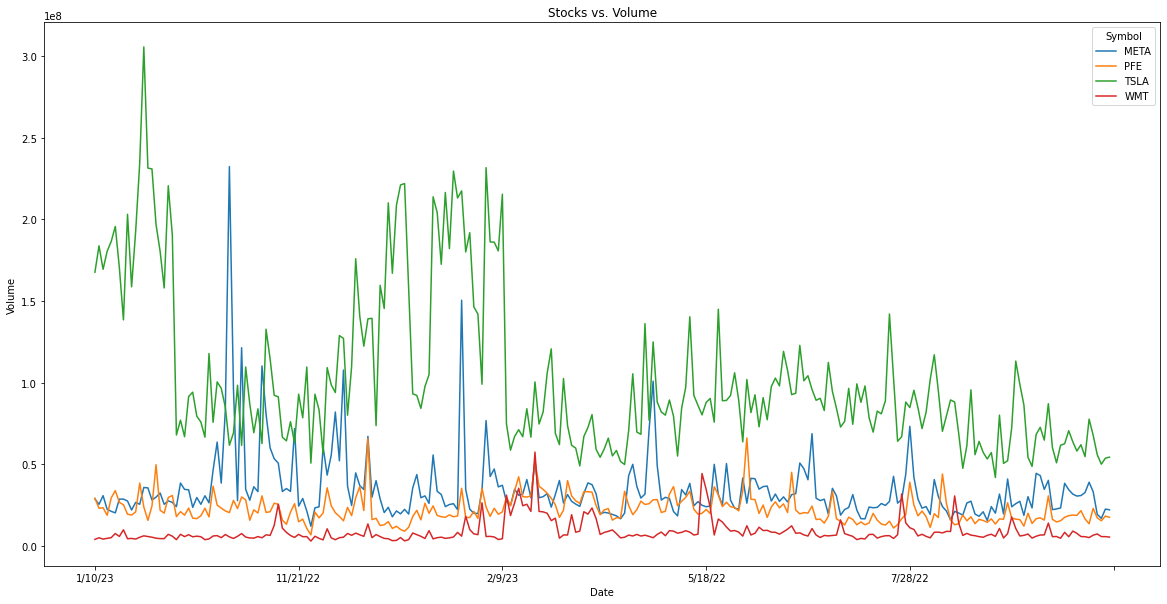

In [2]:
# Compute the IQR for each numerical column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter out rows with outliers in any numerical column
# df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


import matplotlib.pyplot as plt
import pandas as pd

# Load the data


# Get the unique symbols
symbols = df['Symbol'].unique()

# Loop over the symbols and create a plot for each one
for symbol in symbols:
    # Filter the data for the current symbol
    subset = df[df['Symbol'] == symbol]

    # Create a figure and axis object
    fig, ax = plt.subplots()

    # Plot the data
    ax.plot(subset['Date'], subset['Volume'])

    # Set the x-axis label format
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
 #   ax.xaxis.set_major_formatter(plt.DateFormatter('%Y-%m-%d'))

    # Rotate the x-axis labels
    plt.xticks(rotation=45)

    # Set the axis labels and title
    ax.set_xlabel('Date')
    ax.set_ylabel('Volume')
    ax.set_title(f'{symbol} - Stocks vs. Volume')

    # Show the plot
    #plt.show()
    data_pivot = df.pivot(index='Date', columns='Symbol', values='Volume')

# Plot the data
    data_pivot.plot(kind='line')

# Set the axis labels and title
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.title('Stocks vs. Volume')

# Show the plot
    plt.show()

## Check for any data inconsistencies or errors, such as negative values for prices or volumes

In [3]:
#df[df['Open'] < 0 ]
#df[df['Close'] < 0 ]
#df[df['Volume'] < 0]

## There are no negative open, close and Volume

## Exploratory Data Analysis

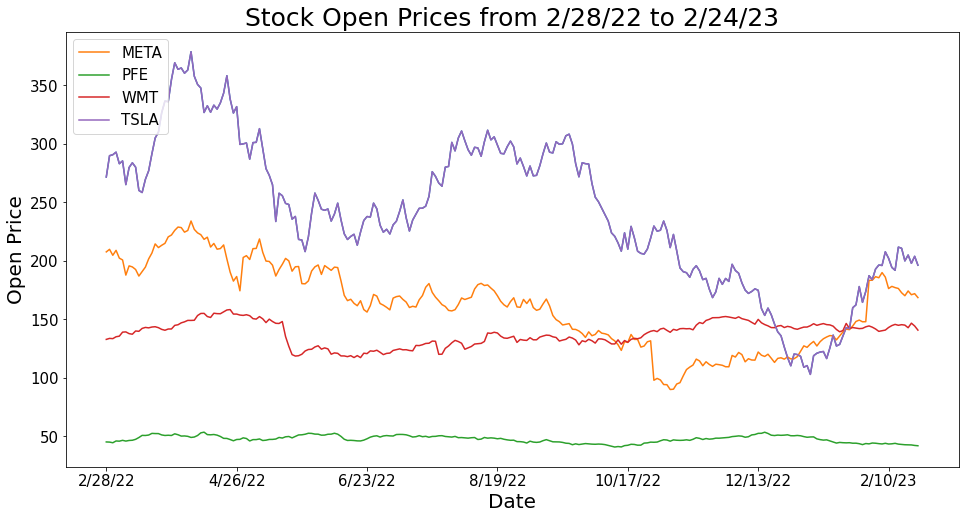

In [4]:
import matplotlib.pyplot as plt


import matplotlib.dates as mdates

# Get the unique symbols from the DataFrame
symbols = df['Symbol'].unique()

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(subset['Date'], subset['Open'])

    # Set the x-axis label format 
ax.xaxis.set_major_locator(plt.MaxNLocator(8))


# Plot the open prices for each symbol
for symbol in symbols:
    data = df[df['Symbol'] == symbol]
    ax.plot(data['Date'], data['Open'], label=symbol)

# Set the title and labels
start_date = df['Date'].iloc[0]
end_date = df['Date'].iloc[-1]
ax.set_title(f"Stock Open Prices from {start_date} to {end_date}", fontsize=25)
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Open Price', fontsize=20)

# Set the tick font sizes
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Add the legend
ax.legend(loc='upper left', fontsize=15)

# Show the plot
plt.show()


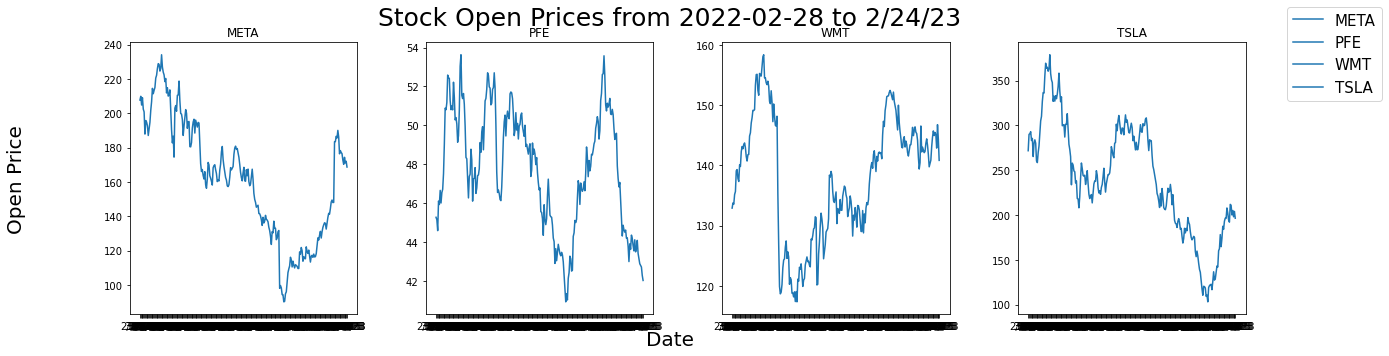

In [5]:
# Get the unique symbols from the DataFrame
symbols = df['Symbol'].unique()

# Create a new figure and four subplots
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

ax.plot(subset['Date'], subset['Open'])

    # Set the x-axis label format 
ax.xaxis.set_major_locator(plt.MaxNLocator(8))


# Plot the open prices for each symbol in each subplot
for i, symbol in enumerate(symbols):
    data = df[df['Symbol'] == symbol]
    axs[i].plot(data['Date'], data['Open'], label=symbol)
    axs[i].set_title(symbol)

    # Set the tick font sizes
    axs[i].tick_params(axis='x', labelsize=10)
    axs[i].tick_params(axis='y', labelsize=10)

# Set the title and labels for the entire figure
end_date = df['Date'].iloc[-1]
fig.suptitle(f"Stock Open Prices from 2022-02-28 to {end_date}", fontsize=25)
fig.text(0.5, 0.04, 'Date', ha='center', fontsize=20)
fig.text(0.04, 0.5, 'Open Price', va='center', rotation='vertical', fontsize=20)

# Add the legend
fig.legend(loc='upper right', fontsize=15)

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3)

# Show the plot
plt.show()


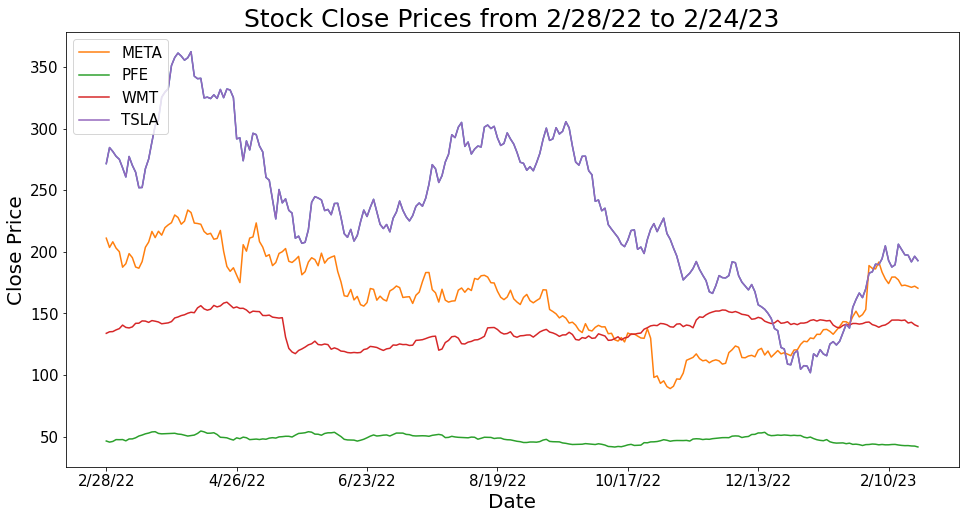

In [6]:

#df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y').dt.strftime('%Y-%m-%d')

# Get the unique symbols from the DataFrame
symbols = df['Symbol'].unique()

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(subset['Date'], subset['Close'])

    # Set the x-axis label format 
ax.xaxis.set_major_locator(plt.MaxNLocator(8))


# Plot the open prices for each symbol
for symbol in symbols:
    data = df[df['Symbol'] == symbol]
    ax.plot(data['Date'], data['Close'], label=symbol)

# Set the title and labels
start_date = df['Date'].iloc[0]
end_date = df['Date'].iloc[-1]
ax.set_title(f"Stock Close Prices from {start_date} to {end_date}", fontsize=25)
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Close Price', fontsize=20)

# Set the tick font sizes
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Add the legend
ax.legend(loc='upper left', fontsize=15)

# Show the plot
plt.show()


Symbol: META
Mean Squared Error: 1.56
RMSE: 1.25
MAE: 0.84
R2 Score: 1.00


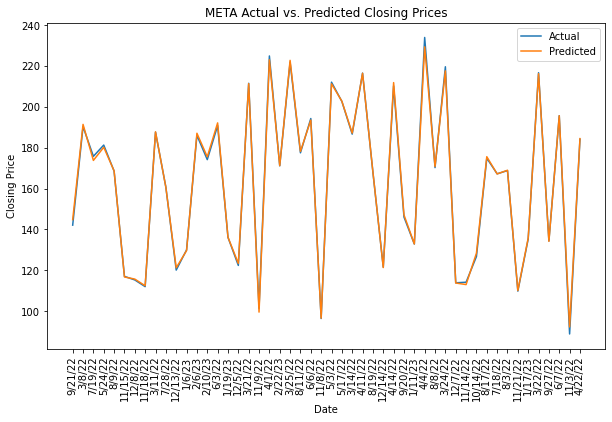

Symbol: META
Predicted prices: [144.83100068 191.3905011  173.77440307 180.19299743 168.67260117
 116.79040007 115.74430173 112.49740005 187.75880203 160.6293982
 121.27450049 129.67669753 187.04960175 175.5490013  192.11819871
 136.20890014 123.41429917 211.28710238  99.60019837 222.97609999
 171.21590302 222.69810027 178.19279999 193.4818979   96.63329987
 211.22830233 202.7291011  187.13560166 216.37660096 168.18670119
 121.3867002  211.82120318 147.16259936 132.93260209 229.3108
 170.78000381 217.5356009  113.83000246 113.05949988 128.41799925
 175.59130264 167.15729919 168.96240097 110.14719941 135.82879624
 216.17070177 134.20859558 195.61910354  92.36080078 184.42619828]
Actual prices: [142.1199951  190.2899933  175.7799988  181.2799988  168.5299988
 117.0800018  115.3300018  112.0500031  187.6100006  160.7200012
 120.1500015  130.0200043  186.0599976  174.1499939  190.7799988
 136.1499939  122.4300003  211.4900055  101.4700012  224.8500061
 171.1199951  221.8200073  177.4900055

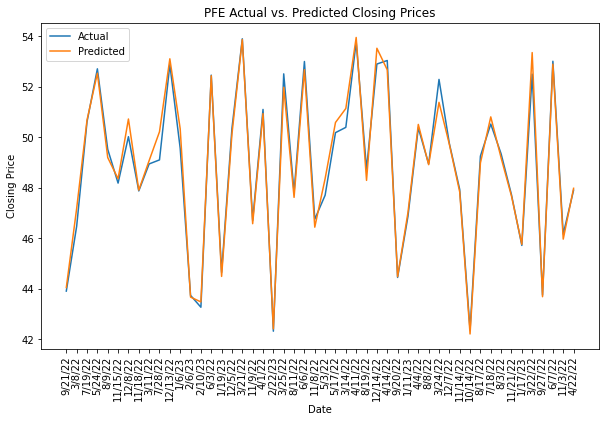

Symbol: PFE
Predicted prices: [44.04190098 47.17680019 50.68010017 52.53590016 49.19239979 48.35190064
 50.72089993 47.90049969 49.07159996 50.21489983 53.10740013 50.33259953
 43.6611002  43.47159931 52.43580013 44.48200054 50.12659985 53.87009975
 46.57130051 50.93480004 42.40089924 51.97760033 47.61479992 52.67640007
 46.43340084 48.35799969 50.58250034 51.1376001  53.95289986 48.28800045
 53.52490005 52.67120087 44.47120052 47.01090057 50.50630005 48.91090027
 51.38140061 49.71839996 47.82949997 42.19999954 48.97920067 50.80479981
 49.17779953 47.66969948 45.75319923 53.35420033 43.67710026 52.89579975
 45.95989933 47.9734996 ]
Actual prices: [43.90000153 46.47000122 50.61000061 52.70999908 49.52000046 48.18000031
 50.02000046 47.86999893 48.93999863 49.09999847 52.88000107 49.56000137
 43.72999954 43.25999832 52.45999908 44.63999939 50.34999847 53.90000153
 46.70000076 51.09999847 42.31000137 52.50999832 47.81000137 53.
 46.75       47.70000076 50.18000031 50.38999939 53.77999878 

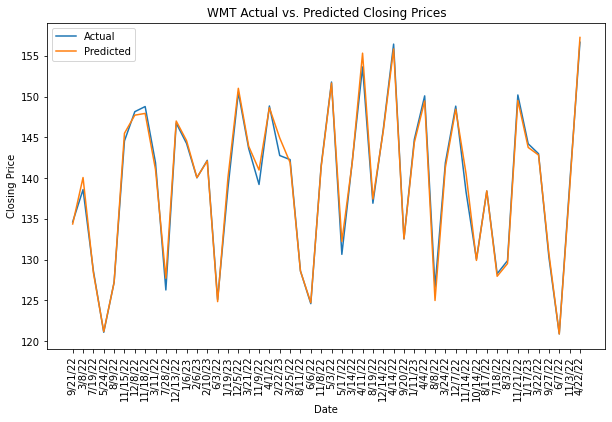

Symbol: WMT
Predicted prices: [134.36160339 140.06129821 128.39479997 121.16759912 127.19080034
 145.489301   147.71409989 147.92839997 141.04240112 127.71779878
 146.99200242 144.58390016 140.05889756 142.08860244 124.83840162
 140.0743985  151.00779997 143.89939818 140.98379974 148.62460129
 144.91020112 141.89339996 128.59530046 124.71190176 141.34410049
 151.64119964 132.22509826 141.8776001  155.31770323 137.43110199
 145.76420121 155.83470442 132.5356993  144.354899   149.45980103
 124.9801007  141.3111023  148.43720109 140.50589842 129.89520141
 138.42859999 127.94910242 129.505103   149.52080124 143.75349594
 142.82279906 130.74090056 120.87049897 138.62050154 157.24460189]
Actual prices: [134.6199951 138.5800018 128.6000061 121.0800018 127.2099991 144.5500031
 148.1399994 148.7700043 141.8800049 126.2699966 146.7400055 144.2400055
 140.0299988 142.1699982 125.0899963 138.7899933 150.5099945 143.6199951
 139.2100067 148.8399963 142.7599945 142.2599945 128.6000061 124.5899963
 1

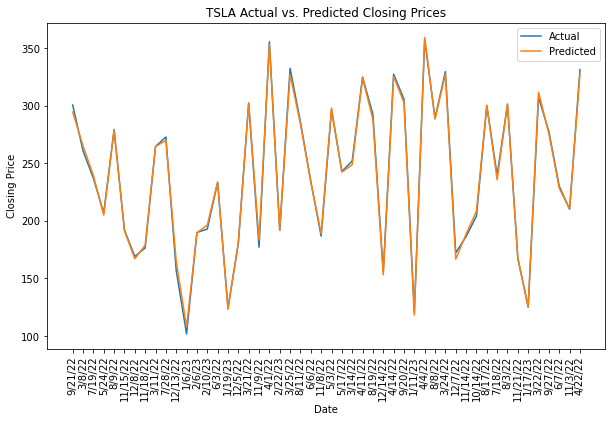

Symbol: TSLA
Predicted prices: [294.55066863 265.04157027 239.17593551 204.99176696 278.60913056
 191.25230121 167.11140105 178.84190079 264.50813232 269.78426696
 164.98809938 107.85779793 189.68040192 196.3341011  233.62423249
 123.08279921 181.37990099 301.93810119 183.55500154 353.12784118
 191.83500126 327.17636719 284.03870177 233.74193466 188.98360123
 297.96096374 242.34599991 248.79559951 324.1988681  287.96800108
 153.27319672 325.22759826 302.75666717 118.20999962 359.22953643
 288.33059906 327.27416901 166.81460128 188.59740159 208.43313355
 300.42906737 235.64753389 301.61693389 167.26520204 125.70339958
 311.71910157 275.61850249 228.32953079 210.3200328  327.8606366 ]
Actual prices: [300.6300049 260.7233276 236.9766693 206.8566742 279.3533325 192.0599976
 169.0599976 176.5500031 264.5899963 272.7999878 156.9100037 101.8099976
 189.9199982 192.8899994 233.4166718 124.3099976 180.5500031 302.3633423
 177.1199951 355.5466614 191.7799988 332.4400024 285.8333435 234.3500061
 

In [8]:
#df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

#df['Date'] = df['Date'].dt.strftime('%d-%m-%Y')

#df.set_index('Date', inplace=True)

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
# Get the list of symbols


#df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

#df['Date'] = df['Date'].dt.strftime('%d-%m-%Y')

df.set_index('Date', inplace=True)

symbols = df['Symbol'].unique()


# Train a Random Forest model for each symbol
for symbol in symbols:
    # Get the data for the current symbol
    symbol_df = df[df['Symbol'] == symbol]
    
    # Define the features and target variable
    X = symbol_df.drop(['Close', 'Symbol'], axis=1)
    y = symbol_df['Close']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train a Random Forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    
    # Predict the stock prices for the testing set
    y_pred = rf.predict(X_test)
    
    # Evaluate the model performance using mean squared error and R2 score
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Symbol: {symbol}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R2 Score: {r2:.2f}")
    
    # Plot the actual and predicted stock prices for the current symbol
    # Plot the actual and predicted stock prices for the current symbol
    plt.figure(figsize=(10,6))
    sorted_test = y_test.sort_index()
    sorted_pred = pd.DataFrame(data=y_pred, index=y_test.index).sort_index()
    plt.plot(y_test.index, y_test.values, label='Actual')
    plt.plot(y_test.index, y_pred, label='Predicted')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.xticks(rotation=90)
    plt.title(f"{symbol} Actual vs. Predicted Closing Prices")
    plt.legend()
    plt.show()
    print(f"Symbol: {symbol}")
    print("Predicted prices:", y_pred)
    print("Actual prices:", y_test.values)


# Using Random Forest to Determine Actual and Predicted Closing Prices

Silhouette score for 2 clusters: 0.5395426730181684
Silhouette score for 3 clusters: 0.6315636569212083
Silhouette score for 4 clusters: 0.632313418044972
Silhouette score for 5 clusters: 0.6632425904246338
Silhouette score for 6 clusters: 0.6146526037506155
Silhouette score for 7 clusters: 0.6261744861201947
Silhouette score for 8 clusters: 0.6235000675621059
Silhouette score for 9 clusters: 0.5587873741139237
Silhouette score for 10 clusters: 0.5629300627119042
Silhouette score for 11 clusters: 0.5720087215631572
Silhouette score for 12 clusters: 0.5639855784530505
Silhouette score for 13 clusters: 0.5532300535821084
Silhouette score for 14 clusters: 0.5450417989264301


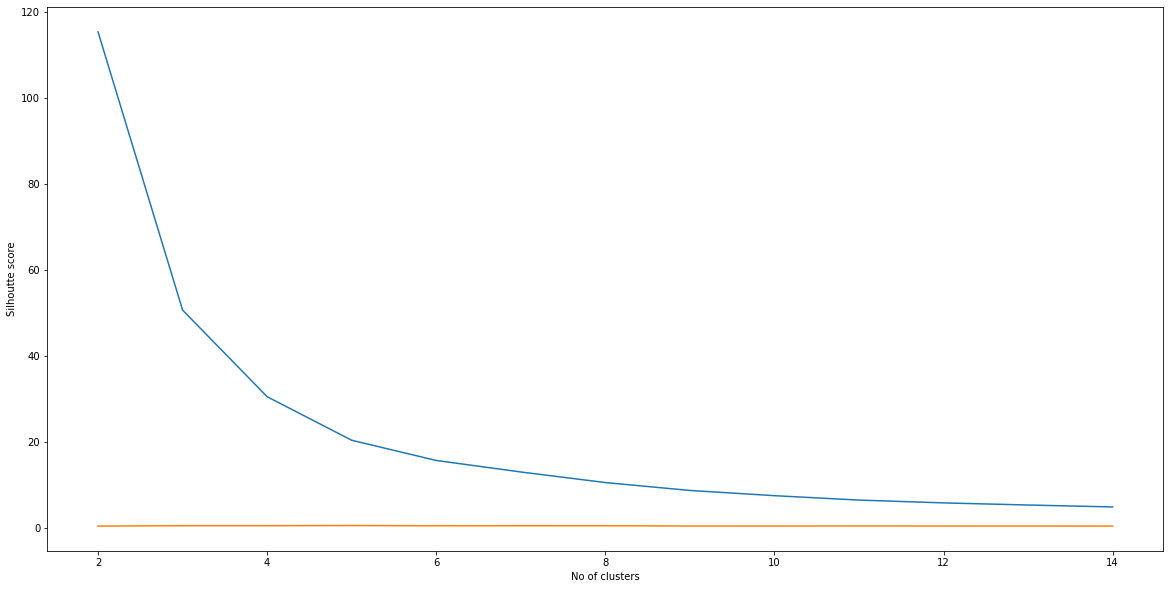

In [11]:

# df = df.drop('Symbol', axis = 1)

X = df[['Open','High', 'Low', 'Close', 'Adj Close']].values


X = X.reshape(-1, 1)


scaler=MinMaxScaler() #initialize
scaler.fit(df)
scaled_df=scaler.transform(df)

##4 steps: import, initialize, train and interpret
km4=KMeans(n_clusters=4, random_state=0)##intialize
km4.fit(scaled_df)##train: finding clusters 

km4.inertia_ ##to calculate within cluster variation
silhouette_score(scaled_df, km4.labels_)

##how many clusters
# Determine the optimal number of clusters using the elbow method

wcv=[]
silk_score=[]
for i in range(2, 15):
    km=KMeans(n_clusters=i, random_state=0)##intialize
    km.fit(scaled_df)##train: finding clusters 

    wcv.append(km.inertia_) ##to calculate within cluster variation
    silk_score.append(silhouette_score(scaled_df, km.labels_))
    
##plotting the wcv
plt.plot(range(2,15), wcv)
plt.xlabel('No of clusters')
plt.ylabel('Within cluster variation')

#plotting silk score
plt.plot(range(2,15), silk_score)
plt.xlabel('No of clusters')
plt.ylabel('Silhoutte score')

for i in range(2, 15):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(scaled_df)
    score = silhouette_score(scaled_df, km.labels_)
    print(f"Silhouette score for {i} clusters: {score}")



# Lets Go with 5 Clusters

In [12]:
km3=KMeans(n_clusters=5, random_state=0)##intialize
km3.fit(scaled_df)##train: finding clusters 

km3.labels_

# Add the cluster labels to the original DataFrame

df['labels'] = km3.labels_


In [13]:
cluster_means = df.groupby('labels').mean()
cluster_means

,Open,High,Low,Close,Adj Close,Volume
labels,,,,,,
0,48.822486,49.774375,50.242422,49.186524,49.752695,2.374191e+07
1,300.901015,300.901015,307.549366,293.215270,300.032699,7.467979e+07
2,140.013525,141.621576,140.588572,139.863892,140.702586,1.788510e+07
3,153.947200,154.313199,158.624200,149.338600,154.405399,1.901518e+08
4,209.899271,211.885447,211.052532,206.455720,209.575173,6.318730e+07


# As we can see here from the clusters 1st Label has PFE and 2nd cluster has TSLA Combined and 3rd has Walamrt 4th label has Meta and TSLA Combined and 5th Label has TSLA and META stock Prices.

In [ ]:
# Perform Hierarchical clustering
linkage_matrix = linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()


# For Hierarchial CLustering based on the threshold at distance 3000 I chose 3 clusters as optimum value here

In [ ]:
hc= AgglomerativeClustering(n_clusters = 3, linkage = 'ward')# initialise
    
hc.fit(scaled_df)
# Add the cluster labels to the dataset
    
df['labels'] = hc.labels_

# Print the summary of results    
Hcmeans = df.groupby('labels').mean()
Hcmeans

In [ ]:
# Based on the Hierarchial Clustering we can see that we have 3 different Stock Prices 1st Label Determines stock prices for Walmart and Meta and 2nd Label Determines stock prices for PFE and 3rd Label Determines Stock Prices for Tesla.

## We utilized the k-means clustering model, along with the elbow plot and dendrogram, to identify market trends. This involved grouping stocks together based on their similar price movements. By doing this, investors can better identify opportunities to buy or sell stocks based on the current market conditions.

## We discovered that META and WMT had very similar price movements and were therefore grouped together as a single cluster. Meanwhile, PFE had a constant price movement and was also grouped as a single cluster. Finally, TSLA was identified as a single cluster due to its unique price movements.

In [ ]:
import matplotlib.pyplot as plt

df = pd.read_csv('Stock Prices updated.csv')

df = df[['Symbol','Date','Open','High','Low','Close','Adj Close','Volume']]

# Group the data by symbol
groups = df.groupby('Symbol')

# Calculate the moving averages for 10, 20, and 50 days for each symbol
for name, group in groups:
    group['MA10'] = group['Adj Close'].rolling(window=10).mean()
    group['MA20'] = group['Adj Close'].rolling(window=20).mean()
    group['MA50'] = group['Adj Close'].rolling(window=50).mean()

    # Plot the data for each symbol with its moving averages
    fig, ax = plt.subplots()
    ax.plot(group['Adj Close'], label='Adj Close')
    ax.plot(group['MA10'], label='MA10')
    ax.plot(group['MA20'], label='MA20')
    ax.plot(group['MA50'], label='MA50')
    ax.set_title(f"{name} Moving Averages")
    ax.legend()
    plt.show()


## Moving Averages for Adj Close of META ,PFE,TSLA and WMT are shown here 

## Moving averages are a commonly used statistical method for analyzing time series data. A moving average is a calculation of the average value of a series of data points over a specified period of time, where the calculation "moves" forward in time as new data points become available.

## For example, a 10-day moving average for a stock price would be calculated by taking the average of the stock's closing prices over the most recent 10 days. As each new day's closing price is added to the series, the oldest closing price is dropped and the average is recalculated using the remaining 9 days' closing prices.

## Moving averages are often used to smooth out the fluctuations in a time series, making it easier to identify trends and patterns in the data. They can also be used as a signal for buying or selling assets, with traders often looking for crossovers between different moving averages as an indication of a change in market sentiment.

In [ ]:
import pandas as pd
from scipy.stats import norm

# Group the data by symbol
groups = df.groupby('Symbol')

portfolio_value = 1000

import pandas as pd
import matplotlib.pyplot as plt



for name, group in groups:
    group['daily_return'] = group['Adj Close'].pct_change()
    avg_return = group['daily_return'].mean()
    print(f"Average daily return for {name}: {avg_return}")

# Calculate the daily return for each stock
df['daily_return'] = df.groupby('Symbol')['Adj Close'].pct_change()

# Calculate the average daily return for each stock
avg_daily_return = df.groupby('Symbol')['daily_return'].mean()

# Plot the average daily return for each stock
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(avg_daily_return.index, avg_daily_return.values)
ax.set_xlabel('Symbol')
ax.set_ylabel('Average Daily Return')
ax.set_title('Average Daily Return for Each Symbol')
plt.show()
    


## As we can see from here the the average daily returns for different stocks and only walmart has a positive Average Daily return when compared to other Stocks

## Average daily return is the average percentage change in the price of a stock or portfolio of stocks over a given period, usually one trading day. It is calculated by taking the sum of the daily returns over the period and dividing it by the number of trading days in that period.

## The average daily return is an important measure used in the stock market to evaluate the performance of a stock or portfolio of stocks. It provides investors with an indication of how much their investment is expected to grow or shrink on a daily basis. By analyzing the historical average daily returns, investors can make informed decisions about which stocks or portfolios to invest in, based on their risk tolerance and investment goals.

## Furthermore, average daily return is often used in the calculation of other financial metrics such as volatility, which measures the degree of variation in the price of a stock or portfolio over time. Volatility is a key consideration for investors, as it helps them to understand the potential risks and rewards of an investment.

## 

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm


# Set the portfolio value (in dollars)
portfolio_value = 10000

# Group the data by symbol
groups = df.groupby('Symbol')

# Calculate the daily returns for each symbol
for name, group in groups:
    group['daily_return'] = group['Adj Close'].pct_change()
    
    # Calculate the mean and standard deviation of the daily returns
    mean_daily_return = group['daily_return'].mean()
    std_daily_return = group['daily_return'].std()
    
    # Calculate the VaR at a 95% confidence level for a time period of 1 day
    z_score = norm.ppf(0.05)
    var = (mean_daily_return - (z_score * std_daily_return)) * portfolio_value
    
    print(f"Value at Risk (VaR) for {name}: ${var:.2f}")

    

## Value at Risk (VaR) is a statistical measure used to estimate the amount of potential loss that an investment portfolio may incur over a given time period at a certain level of confidence. VaR is usually expressed as a dollar amount or a percentage of the portfolio's total value.

## Dividends are a part of a company's profits that are distributed to its shareholders. When calculating VaR for a portfolio that includes dividend-paying stocks, the dividends received by the portfolio can be taken into account as a source of income. This income can offset some of the potential losses, which in turn reduces the VaR of the portfolio.

## we can see here the Var for META will be 10,000 - 651.5 = $9,348.5 

## We are 95% confident that portfolio value wont be below $9,348.5.



In [ ]:
import matplotlib.pyplot as plt

# Create a figure with subplots for each symbol
fig, axs = plt.subplots(nrows=len(groups), figsize=(10, 8))

# Plot a histogram of daily returns for each symbol
for i, (name, group) in enumerate(groups):
    axs[i].hist(group['daily_return'], bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    axs[i].set_title(name)

# Add a title and adjust the layout
fig.suptitle('Histogram of Average Daily Return by Symbol')
fig.tight_layout()




In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

# Set the portfolio value (in dollars)
portfolio_value = 10000

# Group the data by symbol
groups = df.groupby('Symbol')

# Create empty lists to store expected returns and risks
exp_returns = []
risks = []

# Calculate the daily returns for each symbol
for name, group in groups:
    group['daily_return'] = group['Adj Close'].pct_change()
    
    # Calculate the mean and standard deviation of the daily returns
    mean_daily_return = group['daily_return'].mean()
    std_daily_return = group['daily_return'].std()
    
    # Calculate the VaR at a 95% confidence level for a time period of 1 day
    z_score = norm.ppf(0.05)
    var = (mean_daily_return - (z_score * std_daily_return)) * portfolio_value
    
    # Append expected return and risk to the lists
    exp_returns.append(mean_daily_return)
    risks.append(std_daily_return)

# Convert lists to arrays
exp_returns = np.array(exp_returns)
risks = np.array(risks)

# Create scatter plot
area = np.pi * 20
plt.figure(figsize=(10, 8))
plt.scatter(exp_returns, risks, s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Add annotations for each symbol
for label, x, y in zip(groups.groups.keys(), exp_returns, risks):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.show()


## As we can see here Based on the Risk and Expected return calculated from the mean_daily_return and std_daily_return WMT stock has low risk and a positive Expected Return and TSLA has high risk and a negative Expected return and PFE with low risk and negative expected return and META with high risk and no expected return.

## Using Decision Tree to predict MSE for all the different stocks


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


df = pd.read_csv('Stock Prices updated.csv')
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a decision tree regressor with max_depth=3
tree_reg = DecisionTreeRegressor(max_depth=3)

# Fit the model to the training data
tree_reg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = tree_reg.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

print('Mean Squared Error:', mse)

from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))

plot_tree(tree_reg)
